In [68]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
#from ifitpy import Functions
from ifitpy import Utils
import ifitpy
print(ifitpy.__file__)

import scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/guilherme/Documents/Pyfit/ifitpy/__init__.py


In [69]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# This fit package permits to, well, fit a given x,y data. It encapsulates both iminuit and curve_fit. 
# There are two type of functions. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).

# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters (p0) is used to innitilized the fit

# For Complex functions fit(x,y, n) are fit(x,y,p0) are valid inputs. 
# If n us used then the algorithm will use this value to generate the fitting function with n components
# For example, fit(xx,yy,n=3) will fit a sum of two gaussian(2d) or a 3-degree polinom. And p0 zero is also estimated.
# If fit(x,y,n,p0) p0 will be the innitialization parameters. Note that len(p0) = n*parameters_to_fit.

#There's also a f.fitBinned(xx,yy,bins=50) option which allows to fit a profile histogram instead of the raw data.
#This option is often faster and the recomended one as it takes into account the statistical fluctuation of the data.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [np.float64(-1.0), np.float64(0.0)], m: -1.0, b: 0.0
[np.float64(-1.0), np.float64(0.0)]
-1.0
0.0
[-20.]


/home/guilherme/Documents/Pyfit/ifitpy/Fitter.py:337: OptimizeWarning: Covariance of the parameters could not be estimated
  par, cov, _ = curve_fit(func, x, y, sigma=yerr, p0=p0, maxfev = 10000, xtol=1e-8, bounds=bounds)


Parameters:  [np.float64(0.9996416273846238), np.float64(5.022151015251929)]
Named parameters:  vars: [np.float64(0.9996416273846238), np.float64(5.022151015251929)], m: 0.9996416273846238, b: 5.022151015251929
Retrieving parameters 0.9996416273846238
Initial parameters (array([1.13887468]), array([-2.30567578]))
Chi2 =  0.0
Parameters:  [np.float64(0.999663071239214), np.float64(5.020557034522325)]
Named parameters:  vars: [np.float64(0.999663071239214), np.float64(5.020557034522325)], m: 0.999663071239214, b: 5.020557034522325
Named errors of each parameter:  [np.float64(0.0007300250728715349), np.float64(0.04442732237630226)]
Retrieving parameters 0.999663071239214
Initial parameters (array([0.99818499]), array([5.0664546]))
Chi2 =  0.0


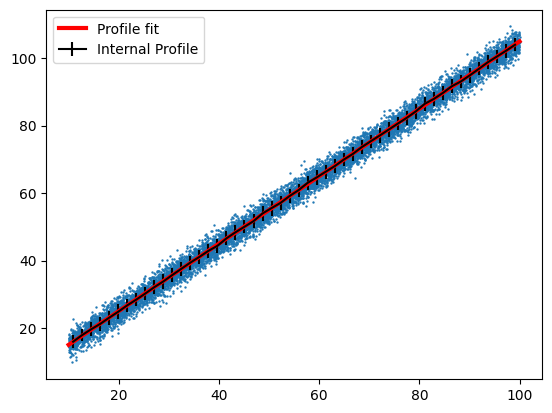

In [66]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

f = Fitter("linear")
f.fit(xx,yy)
p = f.getParams()
print("Parameters: ", p.vars)
print("Named parameters: ", p)
print("Retrieving parameters", p.m)
print("Initial parameters",f.getInitParams())
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx, xx*p.m+p.b, c="orange")


f = Fitter("linear")
f.fitBinned(xx,yy,bins=50)
p = f.getParams()
print("Parameters: ", p.vars)
print("Named parameters: ", p)
print("Named errors of each parameter: ", f.getErrors())
print("Retrieving parameters", p.m)
print("Initial parameters",f.getInitParams())
print("Chi2 = ",f.chi2/f.dof)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="red", label="Profile fit", lw=3)
plt.legend()

Parameters:  [np.float64(3568.7681624732763), np.float64(50.02293067200105), np.float64(9.983858051111692)]
Named parameters:  vars: [np.float64(3568.7681624732763), np.float64(50.02293067200105), np.float64(9.983858051111692)], amp: 3568.7681624732763, mean: 50.02293067200105, sigma: 9.983858051111692
Named errors of each parameter:  [np.float64(8.50726236000623), np.float64(0.027481423515246697), np.float64(0.027481431586724694)]
Retrieving parameters 50.02293067200105
Initial parameters [np.float64(3541.0), np.float64(50.889505967258614), np.float64(10.626492908320877)]
Chi2 =  0.0

Fitting function signature:  x,amp,mean,sigma
Mean is:  50.02567461316286
Sigma is:  9.981970616591337
Amplitude is:  3569.0150510630388


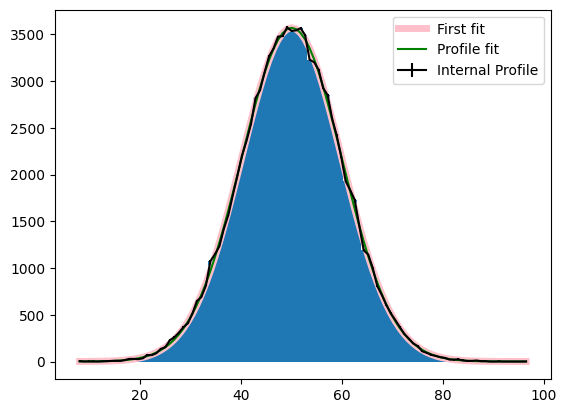

In [67]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f = Fitter("gaussian")
f.fit(xx, yy)
plt.plot(xx,f.evaluate(xx), c="pink", label="First fit", lw=5)

p = f.getParams()
print("Parameters: ", p.vars)
print("Named parameters: ", p)
print("Named errors of each parameter: ", f.getErrors())
print("Retrieving parameters", p.mean)
print("Initial parameters",f.getInitParams())
print("Chi2 = ",f.chi2/f.dof)

f = Fitter("gaussian")
print("\nFitting function signature: ", f)
f.fitBinned(yyt,bins=100)
p = f.getParams()

print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")

plt.legend()

Parameters:  [1.21969184e+04 1.00164852e+01 1.50745255e+01 1.82438864e+04
 8.00160785e+01 1.00777698e+01 2.82893876e+04 1.50034961e+02
 5.18850585e+00 3.68277680e+03 1.89271746e+02 4.98287302e+01
 1.81746434e+04 2.99901521e+02 1.01441139e+01]
Named parameters:  vars: [np.float64(12196.91837764837), np.float64(10.0164852184918), np.float64(15.074525528313178), np.float64(18243.886405560814), np.float64(80.01607850863128), np.float64(10.077769810413821), np.float64(28289.387609571128), np.float64(150.03496137696285), np.float64(5.188505849097349), np.float64(3682.7767998738314), np.float64(189.27174635236824), np.float64(49.82873024742797), np.float64(18174.64344852374), np.float64(299.901520756652), np.float64(10.144113906220676)], amp_0: 12196.91837764837, mean_0: 10.0164852184918, sigma_0: 15.074525528313178, amp_1: 18243.886405560814, mean_1: 80.01607850863128, sigma_1: 10.077769810413821, amp_2: 28289.387609571128, mean_2: 150.03496137696285, sigma_2: 5.188505849097349, amp_3: 3682.

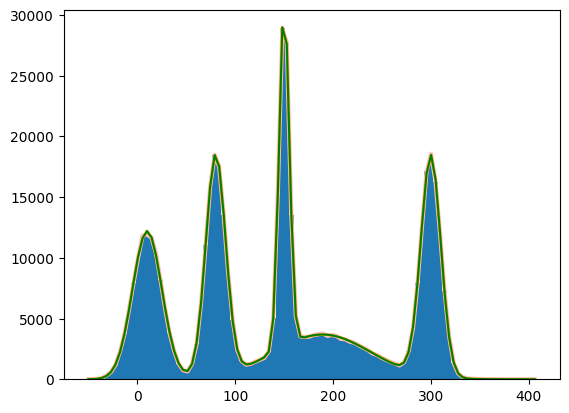

In [53]:
from scipy.interpolate import UnivariateSpline


mu, sig = 20,10
m2 = np.array(np.random.normal(10, 15, size = 100000))
m1 = np.array(np.random.normal(80, 10, size = 100000))
m3 = np.array(np.random.normal(300, 10, size = 100000))
m4 = np.array(np.random.normal(190, 50, size = 100000))
m5 = np.array(np.random.normal(150, 5, size = 80000))

yyt = np.concatenate((m2, m1,m3,m4, m5))
fig = plt.figure()

res = plt.hist(yyt, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
plt.plot(xx,yy,c="pink",lw=3)


gauss_to_find = 5
f = Fitter("gaussian")
f.fit(xx,yy,n=gauss_to_find)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)

plt.plot(xx,f.evaluate(xx), c="orange", lw=2, label="unbinned")

#fit finned
f = Fitter("gaussian")
f.fitBinned(yyt,bins=100,n=gauss_to_find)
p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx,f.evaluate(xx), c="green", label="binned")

Parameters:  [ 9.99894556e+00 -9.90065934e-03]
Named parameters:  vars: [np.float64(9.998945558694938), np.float64(-0.009900659338343104)], p0: 9.998945558694938, p1: -0.009900659338343104
Retrieving parameters 9.998945558694938
vars: [np.float64(9.999758568911954), np.float64(-0.009874937916264818)], p0: 9.999758568911954, p1: -0.009874937916264818


<ErrorbarContainer object of 3 artists>

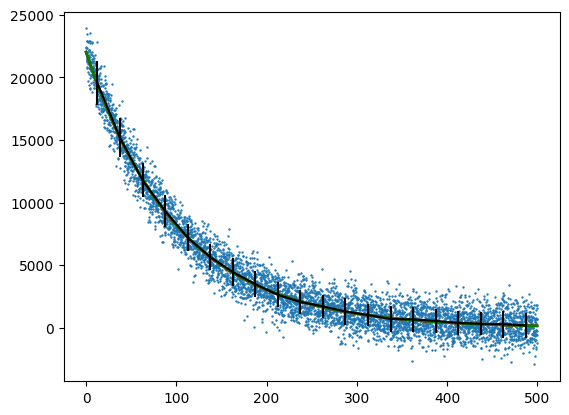

In [51]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)


f = Fitter("expo")
f.fit(xx,yy)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.p0)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)


f = Fitter("expo")
f.fitBinned(xx,yy,bins=20)
p = f.getParams()
print(p)
plt.plot(xx, f.evaluate(xx),color="g",lw=2)
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

/tmp/ipykernel_11826/143126993.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


Parameters:  [-0.03726867  0.01641149  2.74637845  0.63370135  1.13765843  0.43947131]
Named parameters:  vars: [np.float64(-0.037268670631099746), np.float64(0.016411493188876282), np.float64(2.746378446195026), np.float64(0.6337013522909674), np.float64(1.1376584349745869), np.float64(0.4394713052954046)], x0_0: -0.037268670631099746, y0_0: 0.016411493188876282, sigma_x_0: 2.746378446195026, sigma_y_0: 0.6337013522909674, amp_0: 1.1376584349745869, theta_0: 0.4394713052954046
Retrieving parameters -0.037268670631099746


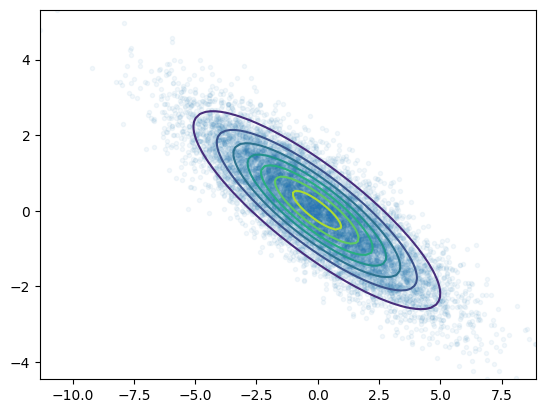

In [50]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")
#f.enableMinuit()
cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.05)


f.fit(x,y)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.x0_0)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

Parameters:  [ 0.03084038  0.01646636  1.24697755  2.84280965  1.93026891  5.29830443
  4.01578904  4.06250972  2.24610676  3.97530177  0.73793045 -0.31063196]
Named parameters:  vars: [np.float64(0.03084038463172572), np.float64(0.016466361408256896), np.float64(1.246977549252426), np.float64(2.8428096488649106), np.float64(1.9302689070329275), np.float64(5.298304426922635), np.float64(4.015789036178119), np.float64(4.062509717248435), np.float64(2.246106762582924), np.float64(3.9753017728922995), np.float64(0.7379304548868602), np.float64(-0.31063195722438475)], x0_0: 0.03084038463172572, y0_0: 0.016466361408256896, sigma_x_0: 1.246977549252426, sigma_y_0: 2.8428096488649106, amp_0: 1.9302689070329275, theta_0: 5.298304426922635, x0_1: 4.015789036178119, y0_1: 4.062509717248435, sigma_x_1: 2.246106762582924, sigma_y_1: 3.9753017728922995, amp_1: 0.7379304548868602, theta_1: -0.31063195722438475
Retrieving parameters 3.9753017728922995


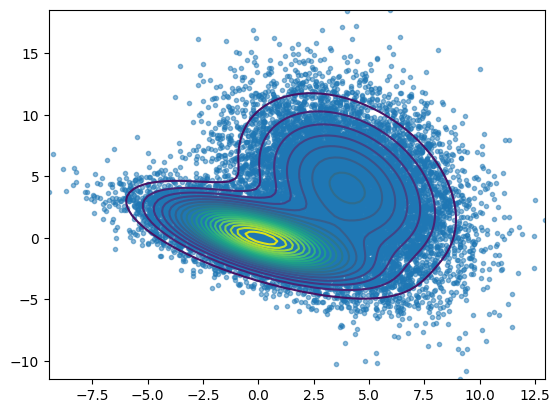

In [48]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=2)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

Parameters:  [-1.35951517 -3.66378759  2.78563436 -1.37220425 -0.71991538  0.61360193
  0.62389474  1.61667924  2.71452407  4.60879313  1.38884747 -2.89525343
 14.99688126  5.03372055  2.82328076  1.2175556   1.97459702 10.0164595 ]
Named parameters:  vars: [np.float64(-1.3595151692814627), np.float64(-3.6637875900278436), np.float64(2.785634362638052), np.float64(-1.3722042512838202), np.float64(-0.7199153842951018), np.float64(0.6136019276370526), np.float64(0.6238947374919128), np.float64(1.6166792364831557), np.float64(2.714524066090349), np.float64(4.608793127703973), np.float64(1.3888474691251997), np.float64(-2.895253433225218), np.float64(14.996881264441003), np.float64(5.033720550853717), np.float64(2.823280756631296), np.float64(1.2175556025506493), np.float64(1.9745970212062318), np.float64(10.016459501563961)], x0_0: -1.3595151692814627, y0_0: -3.6637875900278436, sigma_x_0: 2.785634362638052, sigma_y_0: -1.3722042512838202, amp_0: -0.7199153842951018, theta_0: 0.6136019276

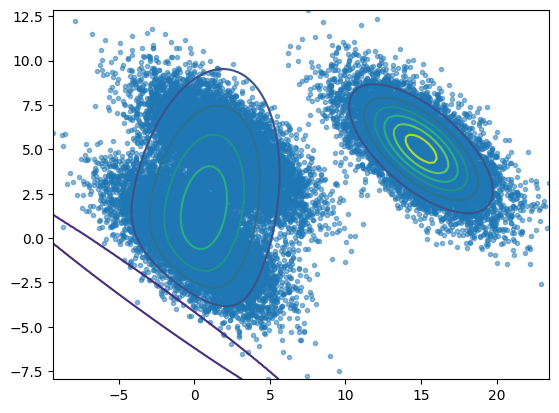

In [47]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=3)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.sigma_y_1)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
[10.04870441 -3.30615247 58.12948962]
vars: [np.float64(10.048704414085147), np.float64(-3.3061524674458713), np.float64(58.12948961844778)], a: 10.048704414085147, b: -3.3061524674458713, c: 58.12948961844778
10.048704414085147


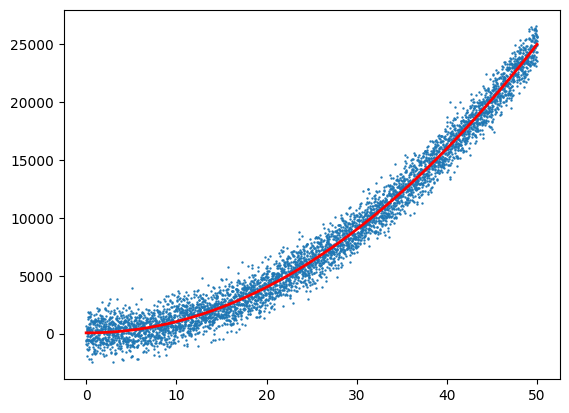

In [43]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.b)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
Parameters:  [ -2.02798618   2.60087672  44.9914572  171.69563328]
Named parameters:  vars: [np.float64(-2.0279861750640724), np.float64(2.6008767216206583), np.float64(44.9914571975919), np.float64(171.6956332815395)], a: -2.0279861750640724, b: 2.6008767216206583, c: 44.9914571975919, d: 171.6956332815395
-2.0279861750640724


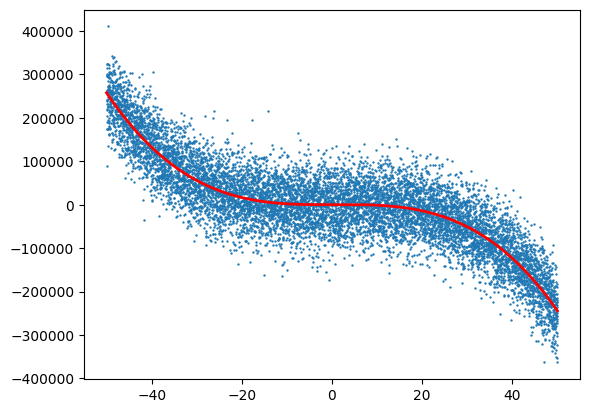

In [46]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print("Parameters: ", f.par)
print("Named parameters: ", p)
print("Retrieving parameters", p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)